# 라이브러리를 불러옵니다

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

# 한글폰트 사용을 위한 세팅

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 데이터 셋 로드 

In [4]:
import glob 

In [5]:
path = glob.glob('data/*.csv')
path

['data\\animal_raw.csv', 'data\\관광지.csv', 'data\\반려견정보.csv']

In [6]:
df = pd.read_csv(path[2], encoding = 'utf-8')
df

,품종,크기(체중에따른),크기(라벨링),나이,산책시간(시간),체중,적정음수량,성별,중성화여부,색상
0,골든 리트리버,대,2,13,0.5,27.0,1755.0,M,N,갈색
1,골든 리트리버,대,2,10,0.5,25.0,1625.0,F,N,갈색
2,골든 리트리버,대,2,9,0.5,40.0,2600.0,M,N,갈색
3,골든 리트리버,대,2,8,0.5,28.0,1820.0,F,N,갈색
4,골든 리트리버,대,2,8,0.5,33.0,2145.0,M,N,갈색
...,...,...,...,...,...,...,...,...,...,...
7821,핏불테리어,대,2,2,1.5,25.0,1625.0,F,U,검은색
7822,화이트테리어,소,0,13,0.5,7.3,474.5,F,Y,흰
7823,화이트테리어,소,0,5,1.5,5.0,325.0,F,U,흰색
7824,휘펫,중,1,2,1.0,14.0,910.0,M,N,베이지


# 데이터 전처리 

## 범주형 변수 제외 

In [7]:
df_1 = df.copy()

In [8]:
# 범주형 변수 ['품종'] 제거 
df_1 = df_1.drop('품종', axis = 1)

In [9]:
# 범주형 변수 ['크기(체중에따른)'] 제거 
df_1 = df_1.drop('크기(체중에따른)', axis = 1)

In [10]:
# 범주형 변수 ['성별'] 제거 
df_1 = df_1.drop('성별', axis = 1)

In [11]:
# 범주형 변수 ['증성화여부'] 제거 
df_1 = df_1.drop('중성화여부', axis = 1)

In [12]:
# 범주형 변수 ['색상'] 제거 
df_1 = df_1.drop('색상', axis = 1)

In [13]:
size = df_1['크기(라벨링)']

In [14]:
# 범주형 변수 ['색상'] 제거 
df_1 = df_1.drop('크기(라벨링)', axis = 1)

In [15]:
df_1

,나이,산책시간(시간),체중,적정음수량
0,13,0.5,27.0,1755.0
1,10,0.5,25.0,1625.0
2,9,0.5,40.0,2600.0
3,8,0.5,28.0,1820.0
4,8,0.5,33.0,2145.0
...,...,...,...,...
7821,2,1.5,25.0,1625.0
7822,13,0.5,7.3,474.5
7823,5,1.5,5.0,325.0
7824,2,1.0,14.0,910.0


# 데이터 살펴보기 

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7826 entries, 0 to 7825
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   나이        7826 non-null   int64  
 1   산책시간(시간)  7826 non-null   float64
 2   체중        7826 non-null   float64
 3   적정음수량     7826 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 244.7 KB


In [17]:
df_1.describe()

,나이,산책시간(시간),체중,적정음수량
count,7826.000000,7826.000000,7826.000000,7826.000000
mean,2.099540,0.897304,7.794053,506.613455
std,2.647694,0.168873,6.967980,452.918710
min,0.000000,0.500000,0.040000,2.600000
25%,0.000000,0.800000,3.000000,195.000000
50%,1.000000,1.000000,5.000000,325.000000
75%,3.000000,1.000000,11.000000,715.000000
max,18.000000,1.500000,60.000000,3900.000000


In [18]:
#결측치 확인
df_1.isna().sum()

나이          0
산책시간(시간)    0
체중          0
적정음수량       0
dtype: int64

# 군집화

In [19]:
# 군집화를 진행하기에 앞서 수월한 시각화 및 설명력을 첨부하기 위하여 PCA를 통해 변수를 2개로 압축해보자.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
#정규화 진행 및 객체 생성
scaler = StandardScaler()

In [21]:
#데이터 학습 
scaler.fit(df_1)

StandardScaler()

In [22]:
scaler_data = scaler.transform(df_1)

In [23]:
#객체생성 (2개의 객체 만들것임)
pca = PCA(n_components = 2)

In [24]:
pca.fit(scaler_data)

PCA(n_components=2)

In [25]:
pca.transform(scaler_data)

array([[ 3.07714573,  5.00216097],
       [ 2.5299662 ,  3.97730424],
       [ 5.14687208,  3.85881165],
       ...,
       [ 1.26839784, -0.75776562],
       [ 1.37249598, -0.23115575],
       [ 2.35522863, -0.15282417]])

In [26]:
#2개의 피쳐로 학습된 데이터를 데이터프레임 형태로 변환해주자 
data = pd.DataFrame(data = pca.transform(scaler_data), columns = ['pc1', 'pc2'])
data.head()

,pc1,pc2
0,3.077146,5.002161
1,2.529966,3.977304
2,5.146872,3.858812
3,2.939454,3.355782
4,3.832847,3.426993


# 그렇다면 몇 개로 군집화를 하는게 가장 적당한가?
- 위의 데이터를 몇 개의 군집화로 나누는 것이 가장 올바른 군집화인지 살펴보자 

`KMeans(n_cluster = k)`

- k개의 군집화를 하겠다는 객체 생성

`Kmeans.fit()`

- 학습시키기

`KMeans.inertia_`

- 학습된 KMeans의 응집도를 확인
- 응집도란 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미
- 즉, 낮을수록 군집화가 더 잘되어있음.

`KMeans.predict(data)`

- 학습된 데이터를 바탕으로 데이터를 변환시켜줌

In [27]:
# 군집화 라이브러리 불러오기 
from sklearn.cluster import KMeans

In [28]:
x = [] #k가 몇개인지 -
y = [] #응집도가 몇인지 

# 범위가 1~30인 이유
for k in range (1,30): 
    kmeans = KMeans(n_clusters = k) # 1~ 29개의 군집화 된 객체를 kmeans라고 함   
    kmeans.fit(data)               # kmeans에다가 data2를 학습시킬것임 
    
    x.append(k)
    y.append(kmeans.inertia_)

    
#k가 n개 일 때 응집도는 a라고 이해하면 된다 

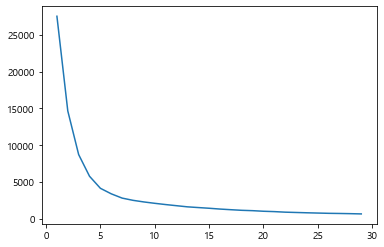

In [29]:
#그래프 그리기
plt.plot(x,y)

In [30]:
# 3개로 군집화 된 객체를 생성 
kmeans = KMeans(n_clusters = 3)

In [31]:
# 군집화 할 데이터 'data2'를 학습시키기 
kmeans.fit(data)

KMeans(n_clusters=3)

In [32]:
# 학습된 kmeans의 응집도 확인 (각 데이터로부터 자신이 속한 군집의 중심까지의 거리)
# 응집도가 낮을수록 군집화가 더 잘되어있는 것이다

In [33]:
# 학습된 데이터를  labels 라는 컬럼에 넣어주자 
data['labels'] = kmeans.predict(data)

In [34]:
data.head()

,pc1,pc2,labels
0,3.077146,5.002161,2
1,2.529966,3.977304,2
2,5.146872,3.858812,0
3,2.939454,3.355782,0
4,3.832847,3.426993,0


In [35]:
# 위의 값들을 시각화 할거고 그래서 pca를 만든것 

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

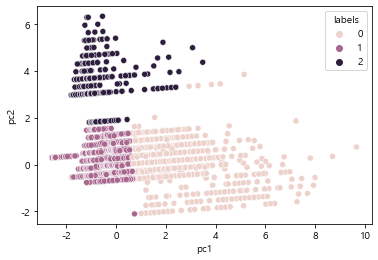

In [36]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'labels', data = data)

# 클러스터링 결과 해석하기

pca와 클러스터링을 통해 결과를 해석해봅시다

어떤 그룹이 대형견 군집인지  평균치로 확인해보자 

In [37]:
data['크기'] = size

In [38]:
data.head()

,pc1,pc2,labels,크기
0,3.077146,5.002161,2,2
1,2.529966,3.977304,2,2
2,5.146872,3.858812,0,2
3,2.939454,3.355782,0,2
4,3.832847,3.426993,0,2


In [39]:
# 시각화를 위해 각 그룹별 크기값을 따로 변수로 생성
# labels값 별 크기의 평균을 구해놓은 변수임

size_0 = data[data['labels']==0]['크기'].mean()
size_1 = data[data['labels']==1]['크기'].mean()
size_2 = data[data['labels']==2]['크기'].mean()

<AxesSubplot:>

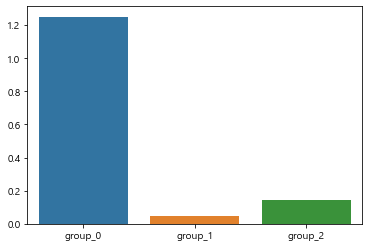

In [40]:
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 '랜덤'임을 잊지 말 것
sns.barplot(x = ['group_0','group_1','group_2'], y = [size_0, size_1, size_2])

In [41]:
df

,품종,크기(체중에따른),크기(라벨링),나이,산책시간(시간),체중,적정음수량,성별,중성화여부,색상
0,골든 리트리버,대,2,13,0.5,27.0,1755.0,M,N,갈색
1,골든 리트리버,대,2,10,0.5,25.0,1625.0,F,N,갈색
2,골든 리트리버,대,2,9,0.5,40.0,2600.0,M,N,갈색
3,골든 리트리버,대,2,8,0.5,28.0,1820.0,F,N,갈색
4,골든 리트리버,대,2,8,0.5,33.0,2145.0,M,N,갈색
...,...,...,...,...,...,...,...,...,...,...
7821,핏불테리어,대,2,2,1.5,25.0,1625.0,F,U,검은색
7822,화이트테리어,소,0,13,0.5,7.3,474.5,F,Y,흰
7823,화이트테리어,소,0,5,1.5,5.0,325.0,F,U,흰색
7824,휘펫,중,1,2,1.0,14.0,910.0,M,N,베이지


In [42]:
df_1

,나이,산책시간(시간),체중,적정음수량
0,13,0.5,27.0,1755.0
1,10,0.5,25.0,1625.0
2,9,0.5,40.0,2600.0
3,8,0.5,28.0,1820.0
4,8,0.5,33.0,2145.0
...,...,...,...,...
7821,2,1.5,25.0,1625.0
7822,13,0.5,7.3,474.5
7823,5,1.5,5.0,325.0
7824,2,1.0,14.0,910.0


In [43]:
# 원본 데이터에 크기를 다시 넣어줍니다.
df_1['크기'] = size
df_1

,나이,산책시간(시간),체중,적정음수량,크기
0,13,0.5,27.0,1755.0,2
1,10,0.5,25.0,1625.0,2
2,9,0.5,40.0,2600.0,2
3,8,0.5,28.0,1820.0,2
4,8,0.5,33.0,2145.0,2
...,...,...,...,...,...
7821,2,1.5,25.0,1625.0,2
7822,13,0.5,7.3,474.5,0
7823,5,1.5,5.0,325.0,0
7824,2,1.0,14.0,910.0,1


In [44]:
# 원본 데이터에 라벨을 복제합니다.
df_1['labels'] = data['labels']
df_1

,나이,산책시간(시간),체중,적정음수량,크기,labels
0,13,0.5,27.0,1755.0,2,2
1,10,0.5,25.0,1625.0,2,2
2,9,0.5,40.0,2600.0,2,0
3,8,0.5,28.0,1820.0,2,0
4,8,0.5,33.0,2145.0,2,0
...,...,...,...,...,...,...
7821,2,1.5,25.0,1625.0,2,0
7822,13,0.5,7.3,474.5,0,2
7823,5,1.5,5.0,325.0,0,0
7824,2,1.0,14.0,910.0,1,0


In [47]:
column = df_1.columns
column

Index(['나이', '산책시간(시간)', '체중', '적정음수량', '크기', 'labels'], dtype='object')

IndexError: index 5 is out of bounds for axis 1 with size 5

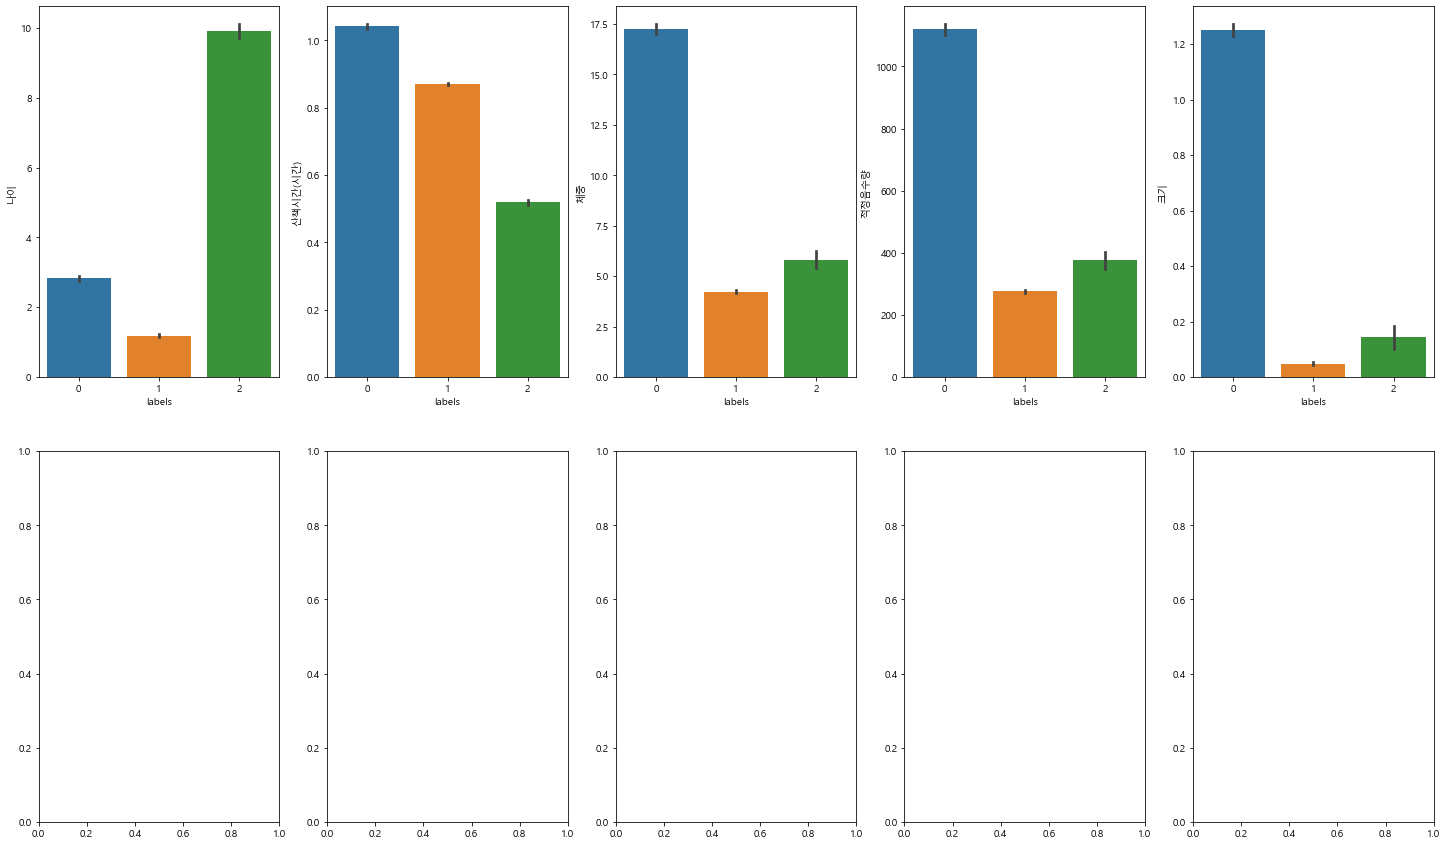

In [48]:
f, ax = plt.subplots(2,5,figsize = (25,15))

        
for i in range(0, 6) :                                    
    sns.barplot(x = 'labels', y = column[i], data = df_1, ax = ax[i//6 , i%6])

In [49]:
#값들을 labels로 묶은 각 컬럼 별 평균치 구해주기
# 지저분한 index들 reset해주깅
df_groupby = df_1.groupby('labels').mean().reset_index()

In [61]:
df_groupby

,labels,나이,산책시간(시간),체중,적정음수량,크기
0,0,2.826711,1.041599,17.235156,1120.285112,1.250359
1,1,1.177568,0.871310,4.240023,275.601470,0.048445
2,2,9.905093,0.518750,5.784028,375.961806,0.143519


In [50]:
column = df_1.columns
column

Index(['나이', '산책시간(시간)', '체중', '적정음수량', '크기', 'labels'], dtype='object')

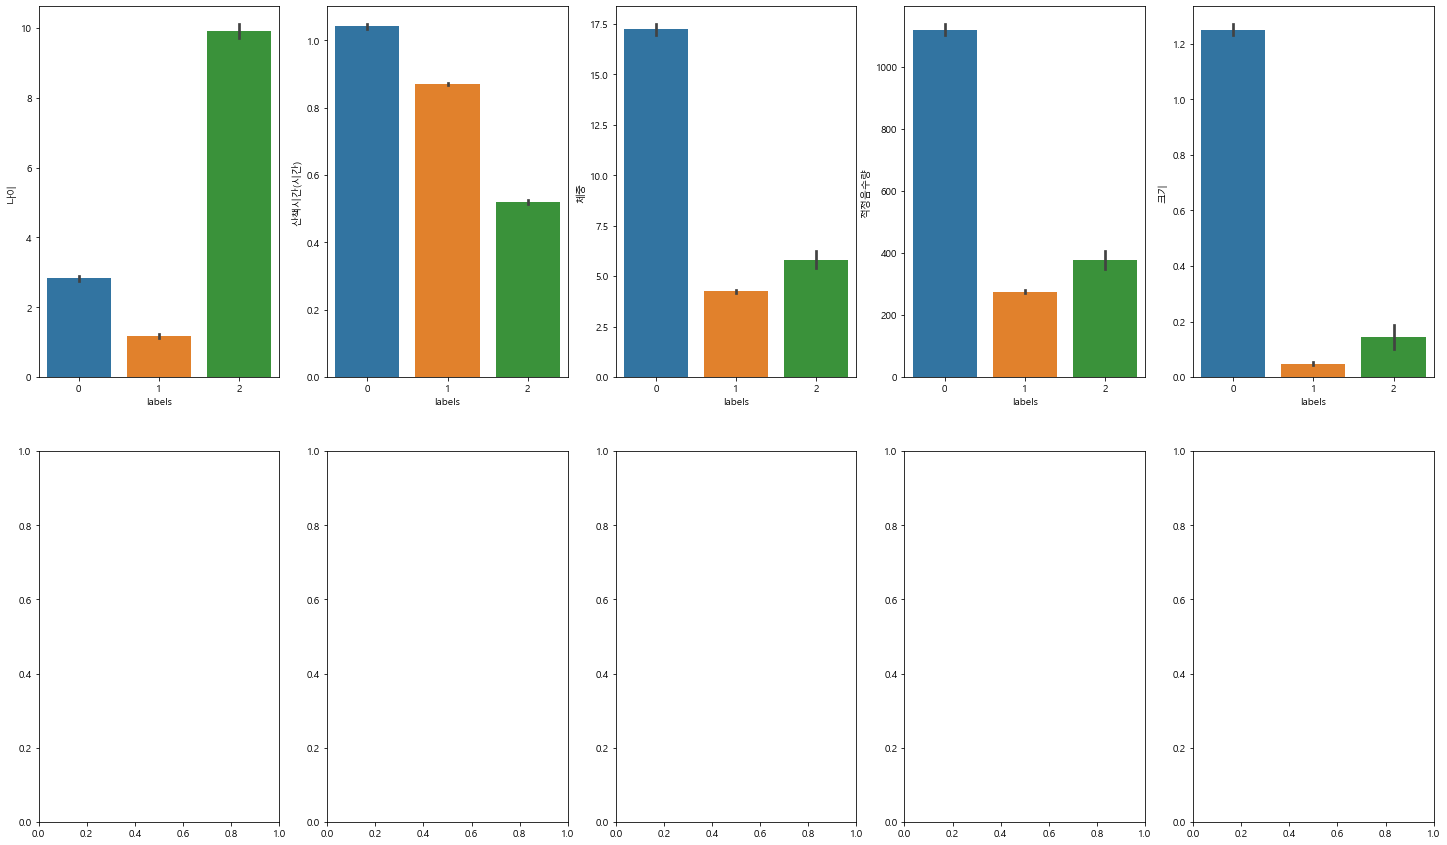

In [51]:
f, ax = plt.subplots(2,5,figsize = (25,15))

        
for i in range(0, 5) :                                    
    sns.barplot(x = 'labels', y = column[i], data = df_1, ax = ax[i//5 , i%5])

<AxesSubplot:xlabel='labels', ylabel='나이'>

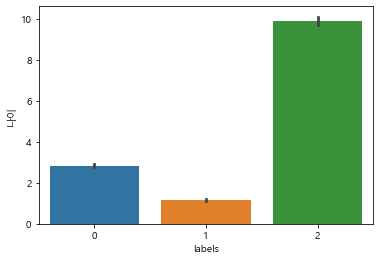

In [52]:
sns.barplot(x = 'labels', y = column[0], data = df_1)

<AxesSubplot:xlabel='labels', ylabel='산책시간(시간)'>

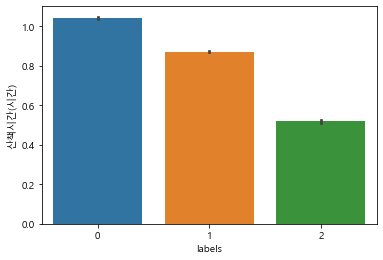

In [53]:
sns.barplot(x = 'labels', y = column[1], data = df_1)

<AxesSubplot:xlabel='labels', ylabel='체중'>

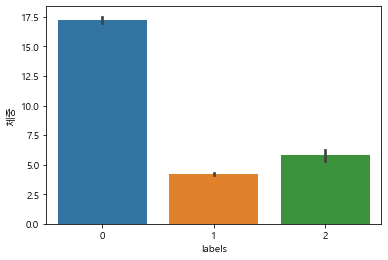

In [54]:
sns.barplot(x = 'labels', y = column[2], data = df_1)

<AxesSubplot:xlabel='labels', ylabel='적정음수량'>

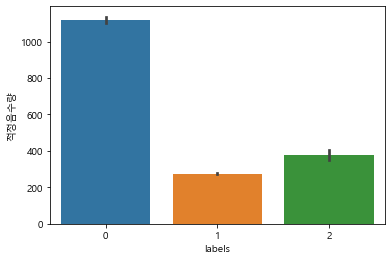

In [55]:
sns.barplot(x = 'labels', y = column[3], data = df_1)

In [56]:
# labels 군집 기준은 아무래도 무게 인것 같음 /  애당초 예상했던 무게를 기준으로 하는 소/중/대형견 크기로 반려동물 숙소 추천서비스 

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

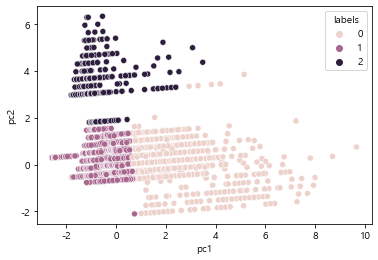

In [57]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'labels', data = data)

In [58]:
#라벨 0 - 자견 
df_1[df_1['labels']==0].describe()

,나이,산책시간(시간),체중,적정음수량,크기,labels
count,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.0
mean,2.826711,1.041599,17.235156,1120.285112,1.250359,0.0
std,1.571305,0.158802,6.138717,399.016609,0.504796,0.0
min,0.000000,0.500000,5.000000,325.000000,0.000000,0.0
25%,2.000000,1.000000,13.000000,845.000000,1.000000,0.0
50%,3.000000,1.000000,16.000000,1040.000000,1.000000,0.0
75%,4.000000,1.000000,20.000000,1300.000000,2.000000,0.0
max,9.000000,1.500000,60.000000,3900.000000,2.000000,0.0


In [59]:
#라벨 1 - 성견
df_1[df_1['labels']==1].describe()

,나이,산책시간(시간),체중,적정음수량,크기,labels
count,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.0
mean,1.177568,0.871310,4.240023,275.601470,0.048445,1.0
std,1.721500,0.105677,2.663652,173.137389,0.214725,0.0
min,0.000000,0.500000,0.040000,2.600000,0.000000,1.0
25%,0.000000,0.800000,2.100000,136.500000,0.000000,1.0
50%,0.000000,0.800000,3.600000,234.000000,0.000000,1.0
75%,2.000000,1.000000,6.000000,390.000000,0.000000,1.0
max,7.000000,1.500000,13.500000,877.500000,1.000000,1.0


In [60]:
#라벨 2 - 노령견
df_1[df_1['labels']==2].describe()

,나이,산책시간(시간),체중,적정음수량,크기,labels
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.0
mean,9.905093,0.518750,5.784028,375.961806,0.143519,2.0
std,2.179374,0.072703,4.480934,291.260689,0.439103,0.0
min,7.000000,0.500000,1.400000,91.000000,0.000000,2.0
25%,8.000000,0.500000,3.145000,204.425000,0.000000,2.0
50%,10.000000,0.500000,4.500000,292.500000,0.000000,2.0
75%,11.000000,0.500000,6.200000,403.000000,0.000000,2.0
max,18.000000,0.800000,30.000000,1950.000000,2.000000,2.0
